# Importing

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\rubix\Downloads\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Coffee_Numerical_Wrangled.csv'))

# Check data

In [4]:
df

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Resting_Heart_Rate
0,40,Male,Germany,3.5,328.1,7.5,3,24.9,78,1,14.5,1,Other,False,False,Average HR
1,33,Male,Germany,1.0,94.1,6.2,3,20.0,67,1,11.0,1,Service,False,False,Average HR
2,42,Male,Brazil,5.3,503.7,5.9,2,22.7,59,2,11.2,2,Office,False,False,Low HR
3,53,Male,Germany,2.6,249.2,7.3,3,24.7,71,1,6.6,2,Other,False,False,Average HR
4,32,Female,Spain,3.1,298.0,5.3,2,24.1,76,2,8.5,2,Student,False,True,Average HR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,Female,Japan,2.1,199.8,6.0,2,30.5,50,2,10.1,3,Healthcare,False,True,Low HR
9996,18,Female,UK,3.4,319.2,5.8,2,19.1,71,2,11.6,2,Service,False,False,Average HR
9997,26,Male,China,1.6,153.4,7.1,3,25.1,66,1,13.7,1,Student,True,True,Average HR
9998,40,Female,Finland,3.4,327.1,7.0,3,19.3,80,1,0.1,1,Student,False,False,Average HR


# Scatterplot

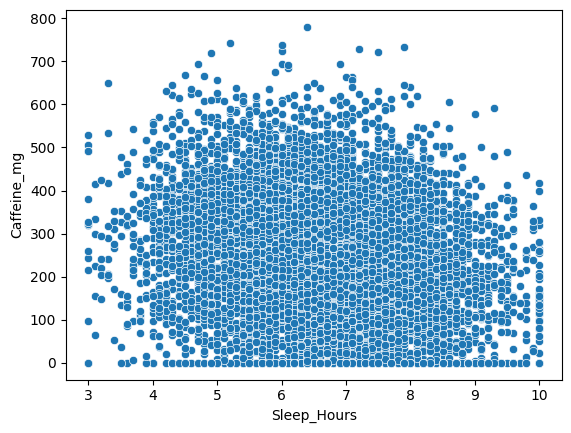

In [5]:
Numerical_Scatter = sns.scatterplot(x = 'Sleep_Hours', y = 'Caffeine_mg',data = df)

# Hypothesis

More caffeine will lead to less time sleeping.

# Reshape data for regression

In [6]:
X = df['Caffeine_mg'].values.reshape(-1,1)
y = df['Sleep_Hours'].values.reshape(-1,1)

# Regression Setup

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
regression = LinearRegression()

## Training data

In [9]:
regression.fit(X_train, y_train)

LinearRegression()

In [10]:
y_predicted = regression.predict(X_test)

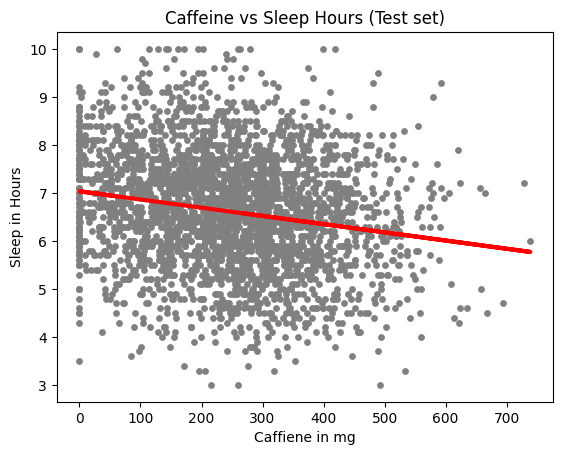

In [11]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Caffeine vs Sleep Hours (Test set)')
plot_test.xlabel('Caffiene in mg')
plot_test.ylabel('Sleep in Hours')
plot_test.show()

Well, I tend to agree with this trend line, but it's not a strong link at all. Wish I knew when the coffee was consumed, but that's not available in this data.

# Model Performance

In [12]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [13]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00171071]]
Mean squared error:  1.4278166559171452
R2 score:  0.03256329893552046


In [14]:
# Comparison dataframe

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.2,6.572906
1,5.3,6.334090
2,4.6,6.351368
3,5.5,6.771691
4,7.2,6.795812
5,6.9,6.238290
6,6.1,6.768440
7,4.7,6.619950
8,5.7,6.680852
9,5.0,6.961751


# Thoughts on model performance

Yeah... these numbers are not very accurate. The variation is just too wide for a proper linear regression. If this data were collected instead of generated I'd say that they did a fantastic job of reprsenting the widest possible groups of people an succeeded in creating truly random data instead of being biased based on location, coffee preference, time of day, etc. I'd suggest that those variables be added to further refine how well coffee affects sleep since the half-life of caffeine is generally known (5-6 hours, give or take individual differences).